In [21]:
import os
import sys
src_path = sys.path[0].replace("paper_working", "src")
# data_path = sys.path[0].replace("notebooks", "data")
if src_path not in sys.path:
    sys.path.append(src_path)

out_path = sys.path[0].replace("paper_working", "output")

import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

rc_={
    "figure.dpi":600,
    "font.size":10,
    "axes.facecolor":"white",
    "savefig.facecolor":"white",
    "text.usetex":True,
    "legend.frameon":False
}
plt.rcParams.update(rc_)

from utils.plot_utils import *
customize_plt() # customize plt configs, see plot_utils

In [2]:
bat_dc=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\sensitive-G1-bat-dc-pv0.5.xlsx'

In [3]:


def cal_relative(df):
    lower_bound=df[(df.strategy=="optimal")&(df.pred_model=="GT")]["OPEX"].values[0]
    upper_bound=df[(df.strategy=="MSC")&(df.pred_model=="GT")]["OPEX"].values[0]
    diff=upper_bound-lower_bound
    df["relative_OPEX"]=(df["OPEX"]-lower_bound)/diff*100
    enhance=df[(df.p_grid_max_method=="by_execution")&(df.pred_model=="Simple")]["relative_OPEX"].values[0]-\
        df[(df.p_grid_max_method=="minimize_cap")&(df.pred_model=="Simple")]["relative_OPEX"].values[0]
    return enhance

In [4]:
def pivot_data(fn,keys,fn_add=None):
    all_df=pd.read_excel(fn,sheet_name="Sheet1",index_col=0)
    if fn_add!=None:
        add_df=pd.read_excel(fn_add,sheet_name="Sheet1",index_col=0)
        all_df=pd.concat([all_df,add_df]) 
    all_df=all_df.reindex()
    all_df["relative_OPEX"]=None
    grouped=all_df.groupby(by=keys).apply(cal_relative)
    grouped_ehance=pd.DataFrame(grouped)
    grouped_ehance=grouped_ehance.reset_index()
    if 'B_kWh' in keys:
        grouped_ehance['B_kWh']=grouped_ehance['B_kWh']/73.6
        grouped_ehance['B_kWh']=grouped_ehance['B_kWh'].round(0)
    if 'price_dc' in keys:  
        grouped_ehance['price_dc']=grouped_ehance['price_dc']*30
        grouped_ehance['price_dc']=grouped_ehance['price_dc'].round(0)
    data=grouped_ehance.pivot(index=keys[0],columns=keys[1])
    return data[0]

dc_bat=pivot_data(
    fn=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\sensitive-G1-bat-dc-pv0.5.xlsx',
    fn_add=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\bat_dc_0.xlsx',
    keys=['B_kWh','price_dc']
)
pv_dc=pivot_data(
    fn=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\sensitive-G3-bat6h-dc-pv.xlsx',
    fn_add=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\pv_dc_0.xlsx',
    keys=['pv_to_bld','price_dc']
)
bat_pv=pivot_data(
    fn=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\sensitive-G2-bat-dc0.6-pv.xlsx',
    fn_add=r'L:\Coding_project\Energy_grid_new\output\experiments\thesis_sensitivity\with-bld-only-not-pv-ev-pred\bat_pv_0.xlsx',
    keys=['B_kWh','pv_to_bld']
)

In [5]:
dc_bat

price_dc,0.0,3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0,27.0,30.0
B_kWh,,,,,,,,,,,
0.0,-0.133684,35.010044,69.490266,22.223050,62.220368,56.090194,51.338772,93.818578,65.083636,82.718870,48.708360
1.0,-0.057308,13.134361,34.645176,49.208396,62.957619,76.764332,84.499744,91.387880,97.564129,102.105991,106.563464
2.0,0.019824,5.830843,20.479639,30.370395,43.246350,59.470442,66.613703,74.416891,80.536619,85.170564,89.744165
3.0,0.098407,1.810090,10.299209,19.665519,31.182940,49.488088,56.192663,64.564090,70.550514,75.023097,79.797129
4.0,0.083305,-1.012248,7.686031,15.329318,26.340664,41.349776,49.978185,58.191870,63.594323,68.852976,73.714277
5.0,-0.044192,-2.429877,5.728578,12.555435,20.585695,33.057983,45.712907,50.378540,59.074480,63.740540,68.560572
6.0,0.225334,-2.133310,3.507454,10.409633,18.515386,30.334815,40.457951,46.317457,52.054015,59.606368,64.360011
7.0,-0.028177,-2.174961,0.562267,8.875905,16.407212,22.726867,31.816352,41.002527,49.192542,53.256266,59.632050
8.0,-0.082746,-1.814154,-2.364076,6.168625,11.538555,19.746581,29.023558,38.306210,44.425612,50.614862,57.404785


In [6]:
bat_pv.index=bat_pv.index.astype(int)
dc_bat.index=dc_bat.index.astype(int)
dc_bat=dc_bat.T
dc_bat.index=dc_bat.index.astype(int)
dc_bat=dc_bat.T
pv_dc=pv_dc.T
pv_dc.index=pv_dc.index.astype(int)
pv_dc=pv_dc.T

In [7]:
dc_bat.columns=dc_bat.columns.astype(int)

In [8]:
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1)

Text(0.5, 0.0, 'Relative regret OPEX improvement')

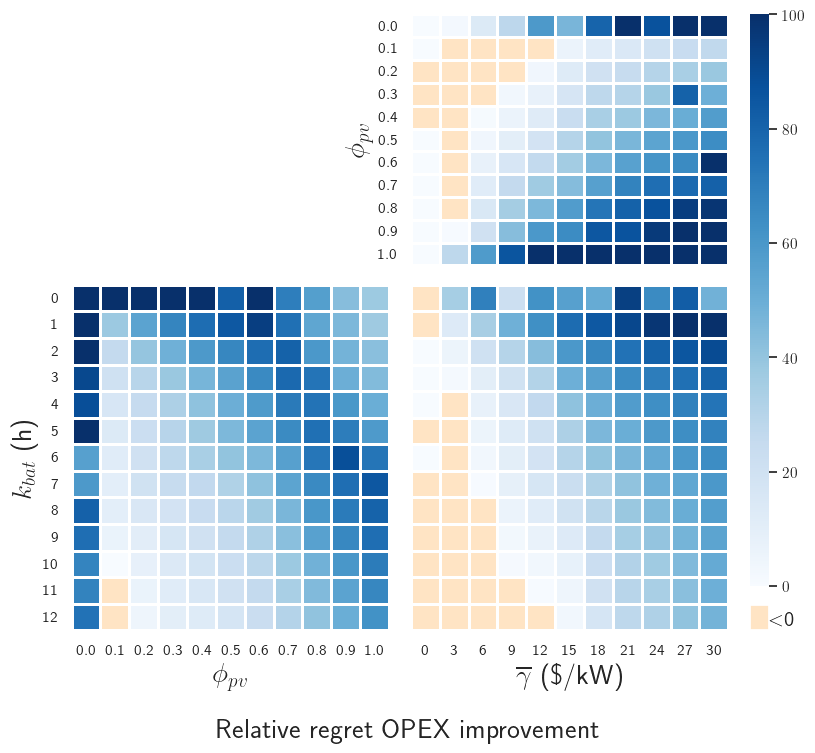

In [9]:
import matplotlib.gridspec as gridspec  # 用网格来创建子图
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(9, 8))  # 创建画布
grid = gridspec.GridSpec(3, 3,width_ratios=[1,1,0.06],height_ratios=[1,1.2,0.1])  # 设定2行*3列的网格
grid.update(wspace = 0.1, hspace = 0.1)
ax1 = fig.add_subplot(grid[0, 1])  # pv_dc
ax2 = fig.add_subplot(grid[1:3, 0])  # bat_pv
ax3 = fig.add_subplot(grid[1:3, 1])  # bat_dc
ax4 = fig.add_subplot(grid[0:2, 2])  # 第一行的全部列都添加到ax1中
ax5 = fig.add_subplot(grid[2, 2])  # 第一行的全部列都添加到ax1中
ax5.xaxis.set_ticks([])
ax5.yaxis.set_ticks([])
ax5.set_facecolor('bisque')
ax5.text(1,0.2,'$<$0',fontsize=15)

cmap=sns.color_palette("Blues", as_cmap=True)
#cmap.set_over('b')
cmap.set_under('bisque')

sns.heatmap(ax=ax1,data=pv_dc,square=False,vmin=0,vmax=100,cmap=cmap,linewidths=1,cbar=False,xticklabels=False) 
sns.heatmap(ax=ax2,data=bat_pv,square=False,vmin=0,vmax=100,cmap=cmap,linewidths=1,cbar=False) 
sns.heatmap(ax=ax3,data=dc_bat,square=False,vmin=0,vmax=100,cmap=cmap,linewidths=1,cbar_ax=ax4,yticklabels=False) 
'''sns.heatmap(ax=ax3, data=dc_bat, square=False, vmin=-5, vmax=100, cmap="RdBu", linewidths=1, cbar=False, yticklabels=False, \
    cbar_kws={"extend": "both", "extendfrac": 0, "extendrect": True, "ticks": [-0, 0, 100], "drawedges": True, \
        "boundaries": [-0, 100], "values": [-0, 100], "colors": ["black", "black"]})'''


ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax1.set_ylabel("$\phi_{pv}$",fontsize=20)
ax1.set_yticklabels(labels=ax1.get_yticklabels(),rotation=0)

ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.set_ylabel("$k_{bat} $ (h)",fontsize=20)
ax2.set_xlabel("$\phi_{pv}$",fontsize=20)
ax2.set_yticklabels(labels=ax2.get_yticklabels(),rotation=0)

ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax3.set_xlabel("$\overline{\gamma} $ (\$/kW)",fontsize=20)


sns.set(font_scale=1.5)
plt.suptitle("Relative regret OPEX improvement",y=0.0,fontsize=20)

In [12]:
pv_dc

price_dc,0,3,6,9,12,15,18,21,24,27,30
pv_to_bld,,,,,,,,,,,
0.0,0.012834,2.086696,13.557513,27.944886,59.056109,46.775044,80.007675,108.020716,87.070975,115.734588,102.762656
0.1,0.013620,-0.856895,-3.540079,-4.925782,-1.120376,6.031611,11.620509,14.761754,20.680394,23.874287,26.611172
0.2,-0.055244,-1.011184,-3.714467,-0.425515,3.538085,12.595719,20.142564,24.409887,30.203126,34.346233,38.354430
0.3,-0.017862,-1.280365,-1.602454,3.334208,7.801395,16.849028,27.359510,30.155088,38.430421,80.578922,49.325666
0.4,-0.021308,-1.840802,0.987257,6.150199,12.237629,23.455877,34.000769,38.068983,45.795938,50.570372,57.785238
0.5,0.008512,-2.083131,3.716537,10.464236,18.516280,30.319835,40.476463,46.392534,54.521099,59.558256,64.450809
0.6,0.069333,-2.632765,7.516960,16.363476,25.804180,36.316103,45.733179,55.836013,60.982487,64.962908,202.876925
0.7,0.047327,-2.865525,11.456469,25.508193,36.733413,43.622127,56.073259,68.136250,75.925622,77.692088,81.237396
0.8,0.195086,-2.138764,14.907599,35.453653,45.612447,58.008231,73.110542,80.611481,86.747572,94.586550,98.041446


Text(0.5, -0.08, 'VoI* improvement (\\%)')

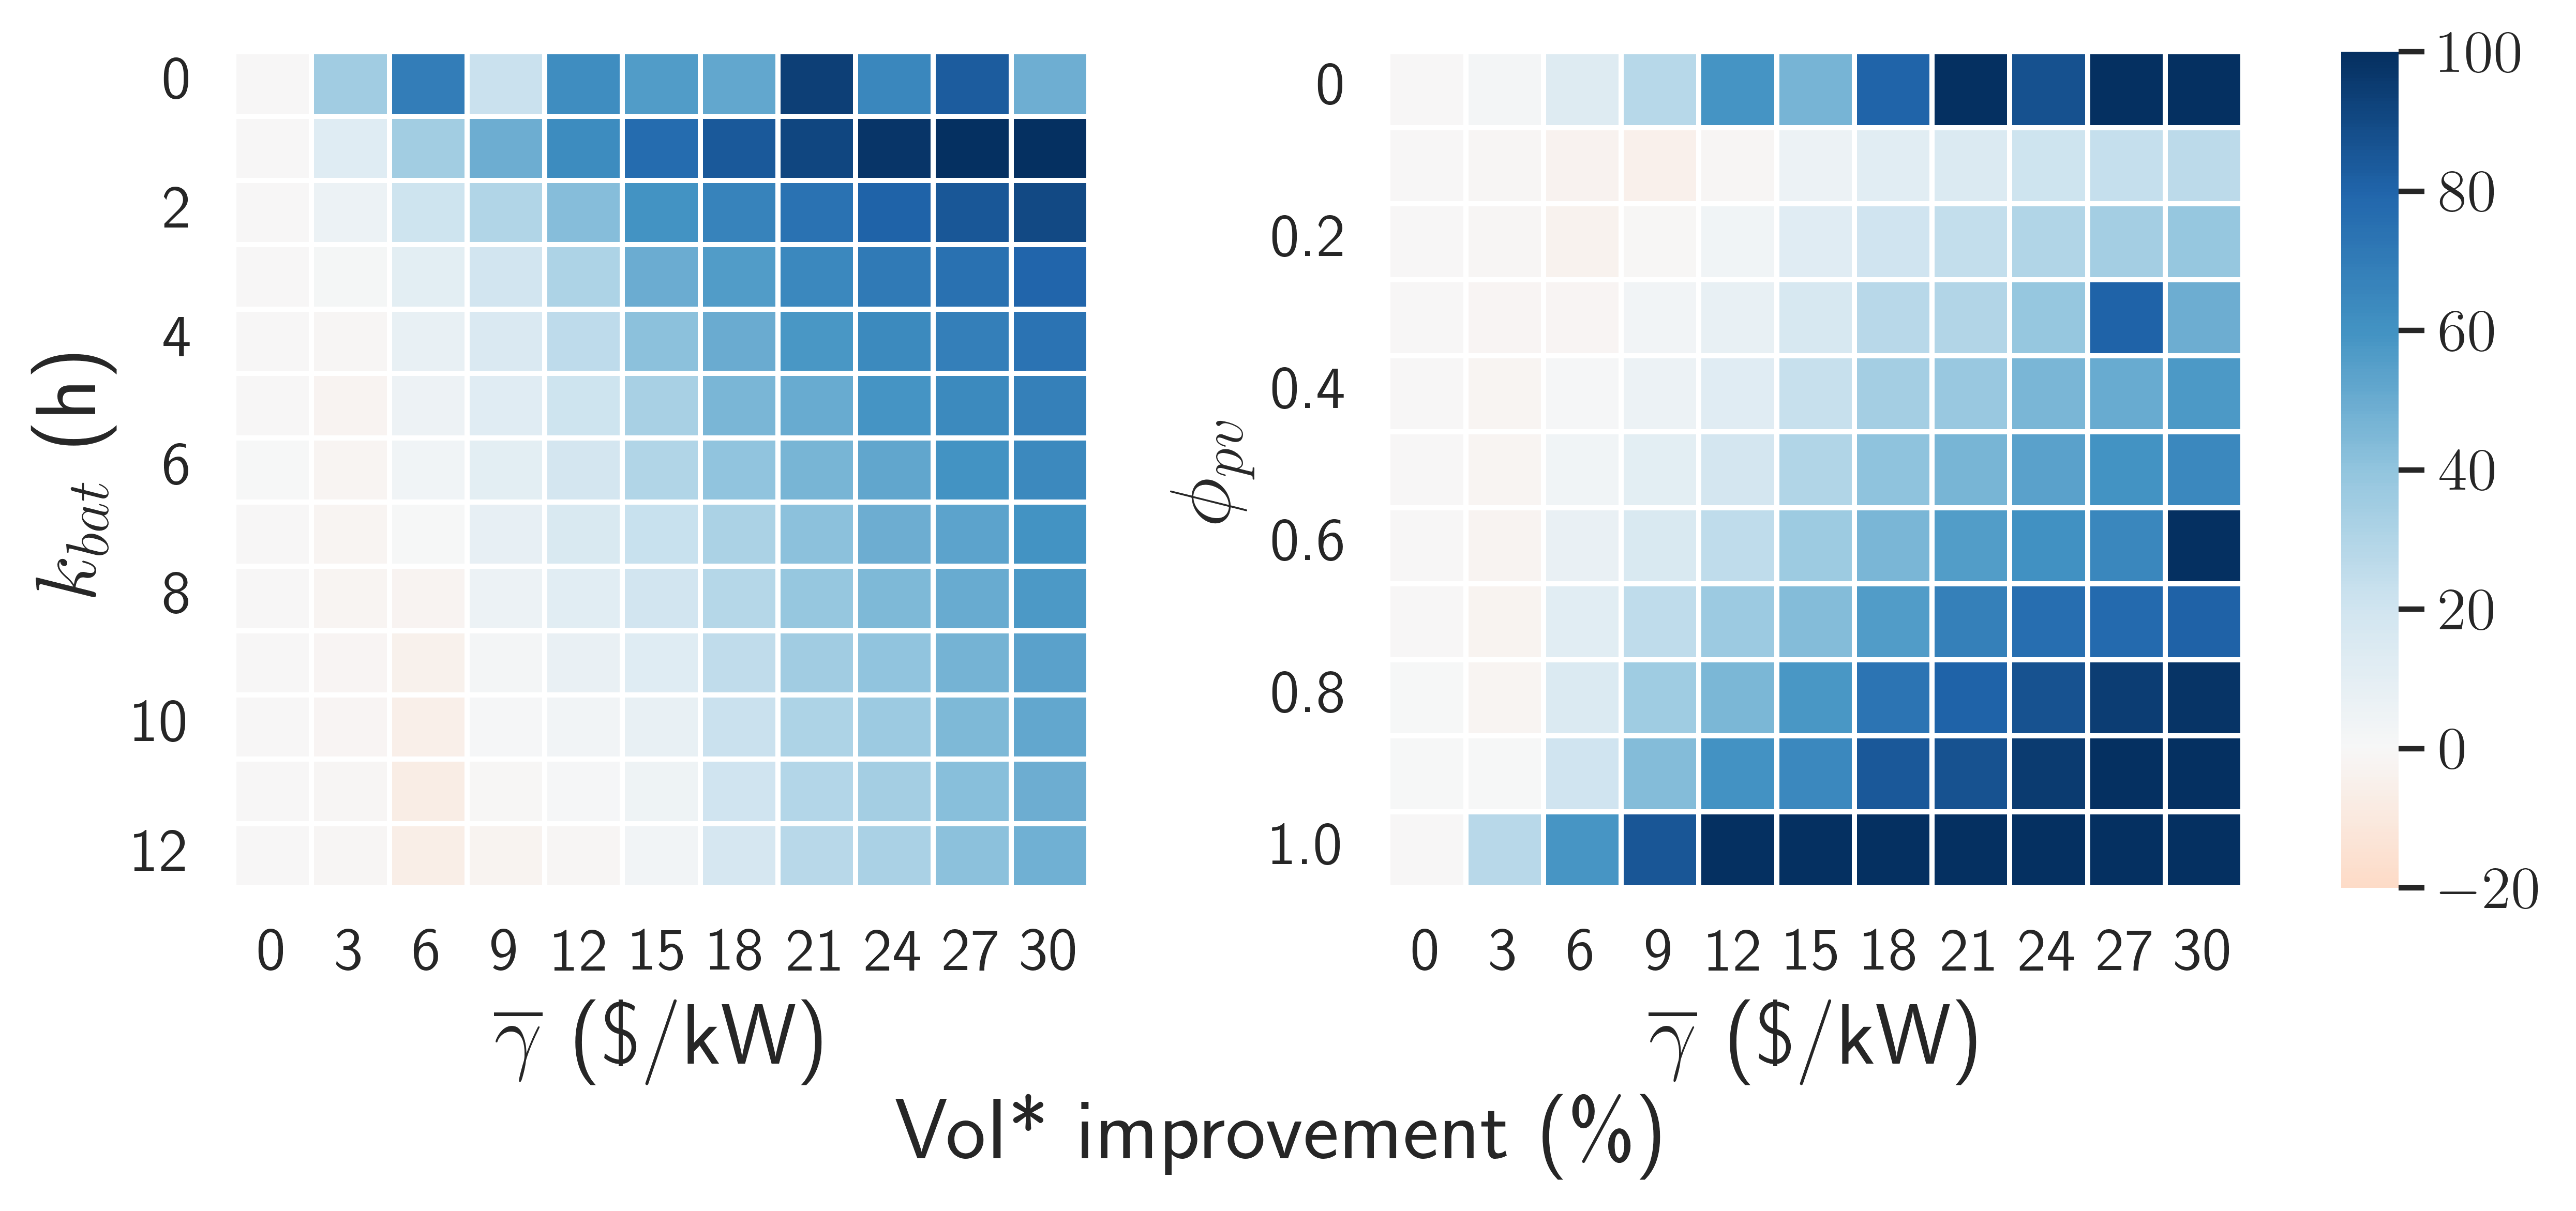

In [22]:
import matplotlib.gridspec as gridspec  # 用网格来创建子图
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(9, 3.5))  # 创建画布
grid = gridspec.GridSpec(2, 3,width_ratios=[1,1,0.06],height_ratios=[1.2,0.1])  # 设定2行*3列的网格
grid.update(wspace = 0.15, hspace = 0.1)

grid01=gridspec.GridSpecFromSubplotSpec(2,2,subplot_spec=grid[:,0:2],width_ratios=[1,1],wspace=0.35)
#ax1 = fig.add_subplot(grid[0, 1])  # pv_dc
ax2 = fig.add_subplot(grid01[:, 0])  # bat_pv
ax3 = fig.add_subplot(grid01[:, 1])  # bat_dc
ax4 = fig.add_subplot(grid[:, 2])  # 第一行的全部列都添加到ax1中
#ax5 = fig.add_subplot(grid[1, 2])  # 第一行的全部列都添加到ax1中

'''ax5.xaxis.set_ticks([])
ax5.yaxis.set_ticks([])
ax5.set_facecolor('bisque')
ax5.text(1,0.2,'$<$0',fontsize=15)'''

def truncate_colormap(cmapIn='jet', minval=0.0, maxval=1.0, n=100):
    '''truncate_colormap(cmapIn='jet', minval=0.0, maxval=1.0, n=100)'''
    cmapIn = plt.get_cmap(cmapIn)

    new_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmapIn.name, a=minval, b=maxval),
        cmapIn(np.linspace(minval, maxval, n)))

    return new_cmap

#cmap=sns.truncate_colormap("RdBu",as_cmap=True)
#cmap.set_over('b')
#cmap.set_under('bisque')
cmap=truncate_colormap("RdBu",0.4,1,120)

#sns.heatmap(ax=ax1,data=pv_dc,square=False,vmin=0,vmax=100,cmap=cmap,linewidths=1,cbar=False,xticklabels=False) 
sns.heatmap(ax=ax2,data=dc_bat,square=False,vmin=-20,vmax=100,annot=False,cmap=cmap,linewidths=1,cbar=False) 
sns.heatmap(ax=ax3,data=pv_dc,square=False,vmin=-20,vmax=100,cmap=cmap,linewidths=1,cbar_ax=ax4 ) #cbar_kws={'ticks':[-20,0,100]}
'''sns.heatmap(ax=ax3, data=dc_bat, square=False, vmin=-5, vmax=100, cmap="RdBu", linewidths=1, cbar=False, yticklabels=False, \
    cbar_kws={"extend": "both", "extendfrac": 0, "extendrect": True, "ticks": [-0, 0, 100], "drawedges": True, \
        "boundaries": [-0, 100], "values": [-0, 100], "colors": ["black", "black"]})'''


'''ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax1.set_ylabel("$\phi_{pv}$",fontsize=20)
ax1.set_yticklabels(labels=ax1.get_yticklabels(),rotation=0)'''

ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.set_ylabel("$k_{bat} $ (h)",fontsize=20)
ax2.set_xlabel("$\overline{\gamma} $ (\$/kW)",fontsize=20)
ax2.set_yticklabels(labels=ax2.get_yticklabels(),rotation=0)

ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax3.set_xlabel("$\overline{\gamma} $ (\$/kW)",fontsize=20)
ax3.set_ylabel("$\phi_{pv}$",fontsize=20)
y_labels=['0','','0.2','','0.4','','0.6','','0.8','','1.0']
#y_labels=['0','0.2','0.4','0.6','0.8','1.0']
ax3.set_yticklabels(labels=y_labels,rotation=0)#labels=y_labels,


sns.set(font_scale=1.3)
plt.suptitle("VoI* improvement (\%)",y=-0.08,fontsize=20)

In [ ]:
bat_pv

pv_to_bld,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
B_kWh,,,,,,,,,,,
0,200.287115,126.921432,111.934362,105.750228,100.001019,81.318189,113.075943,70.017735,56.793074,43.048767,37.575890
1,142.629111,38.062667,54.823043,67.532269,76.522214,84.580609,94.162761,75.055510,53.539437,45.452079,37.388004
2,136.875612,25.546735,39.593339,48.955483,59.145194,66.659038,76.462339,80.787949,59.710466,47.938675,42.576254
3,90.932036,20.395357,29.640187,38.374422,47.196540,55.224632,65.262975,78.034843,73.586538,49.885876,44.164859
4,88.320476,16.117493,25.083590,33.167169,41.180624,49.801083,58.559157,71.524578,74.212692,60.070623,50.186457
5,99.812351,13.594893,22.294717,29.702166,37.342683,45.651698,54.698467,65.023732,75.043418,70.687774,58.615850
6,56.118198,11.380781,20.122010,27.431292,34.035105,40.402281,45.630279,56.098225,72.907896,88.134525,73.084030
7,59.043467,10.066051,19.777452,24.468121,26.493827,31.858299,41.189518,54.363312,65.501692,76.013086,85.041084
8,80.946003,9.964210,15.550875,18.467128,24.204498,28.864978,36.341044,46.392221,60.331602,71.256947,80.351128


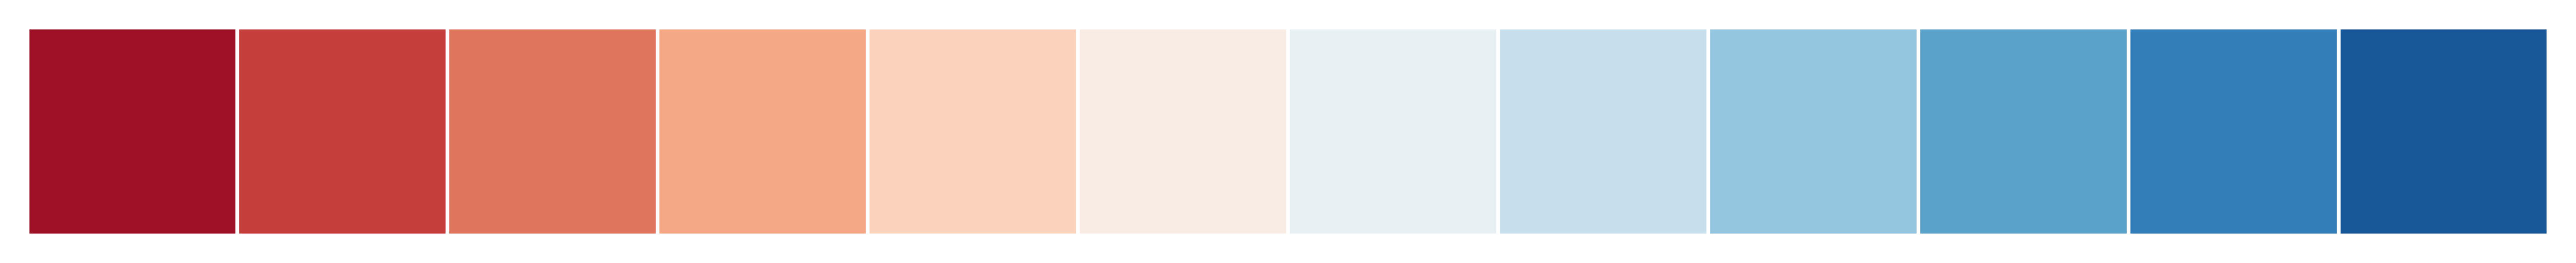

In [ ]:
sns.palplot(sns.color_palette("RdBu",12))


In [ ]:
import seaborn as sns

# Set the number of colors in the colormap
n_colors = 10

# Set the saturation value to truncate the colormap
saturation = 0.8

# Create the truncated colormap
cmap = sns.diverging_palette(220, 10, n=n_colors, s=saturation, as_cmap=True)

# Use the truncated colormap in the heatmap
#sns.heatmap(data, cmap=cmap)

In [ ]:
sns.palplot(cmap)

TypeError: object of type 'LinearSegmentedColormap' has no len()